# Visualización de aportaciones a la escuelita

Lo que necesito es que los posibles donadores vean que no es necesario donar "mucho" dinero, pero sí la constancia mensual. Por ejemplo, observa que el mayor monto lo donamos gente que damos una cantidad pequeña al mes -un cafe y un pastelito- Quisiera resaltar eso para convencer a más donadores que que no es necesario hacer un gran desembolso. Supongo que aplicando alguno de esos programas "mágicos" que tú tienes basta para mostrarlo de un vistazo. La presentación consta de sólo 16 diapositivas, entonces es necesaria la síntesis. En ella planteo la historia de este proyecto que lleva ya 20 años y que actualmente atiende a 130 niños y niñas: preescolar y primaria.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest

In [2]:
df = pd.read_csv("MontosAportacionEscuelita.csv")
df = df.drop('Aportacion anual', axis=1)
df

,Monto aportacion mensual,Numero de donantes,Aportacion mensual
0,150,4,600
1,200,12,2400
2,250,54,13500
3,300,8,2400
4,350,1,350
5,400,4,1600
6,500,22,11000
7,600,1,600
8,1000,9,9000
9,1100,2,2200


In [3]:
bins = pd.cut(df['Monto aportacion mensual'], [0, 250, 500, 1000, 1500, 3000])
agg = df.groupby(bins).sum().drop('Monto aportacion mensual', axis=1)
agg

,Numero de donantes,Aportacion mensual
Monto aportacion mensual,,
"(0, 250]",70,16500
"(250, 500]",35,15350
"(500, 1000]",10,9600
"(1000, 1500]",4,5000
"(1500, 3000]",2,6000


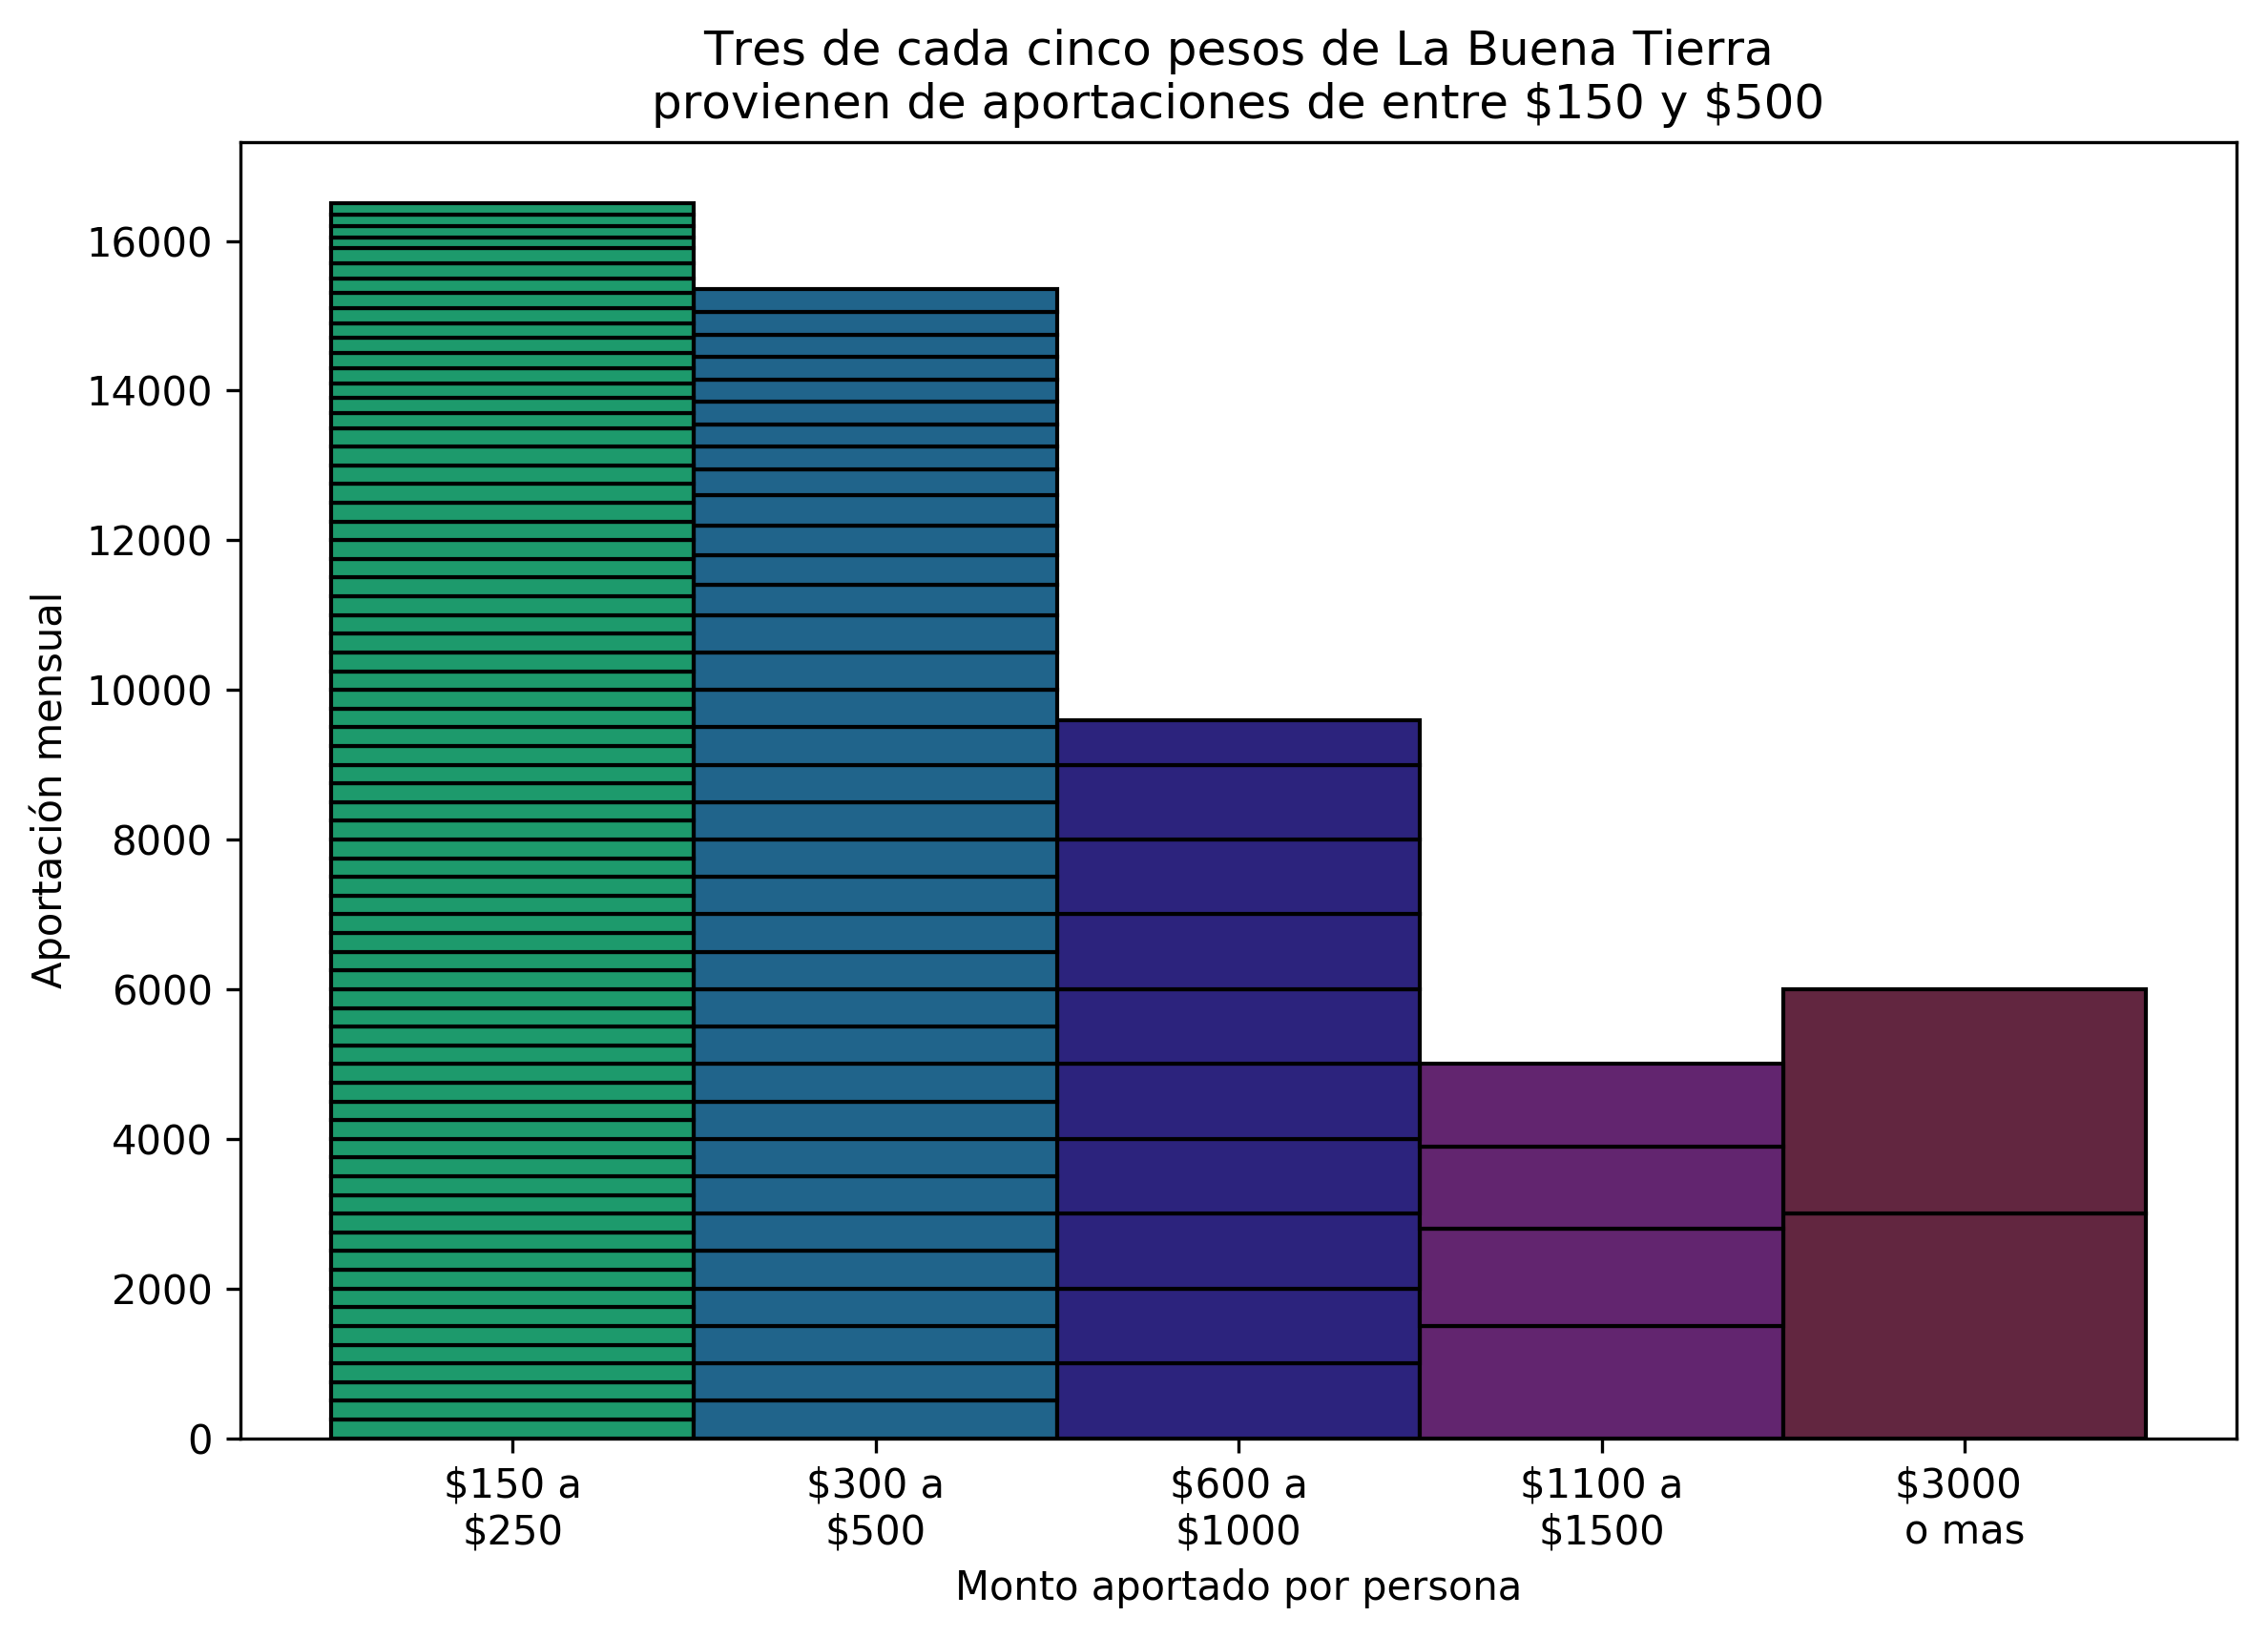

In [10]:
x = [1,2,3,4,5]
width = 1
color = ['#1D9A6C','#20648B', '#2C237D', '#62256F', '#622640']

umbrales = [250, 500, 1000, 1500, 3000]
bins = [[] for i in umbrales]

for row in df.iterrows():
    value, freq = row[1][0], row[1][1]
    for i, umb in enumerate(umbrales):
        if value <= umb: 
            bins[i] += [value]*freq
            break
bins = [sorted(i, reverse = True) for i in bins]


plt.figure(figsize=(9,6), dpi=300)
bottom = np.zeros(5)
for row in zip_longest(*bins,fillvalue=np.nan):
    row = np.array(row)
    plt.bar(x, row, bottom=bottom, color=color, width=width, linewidth=1, edgecolor='black')
    bottom+=row
    
plt.xticks(x, ['$150 a\n$250', '$300 a\n$500', '$600 a\n$1000','$1100 a\n$1500','$3000 \no mas'])
plt.title('Tres de cada cinco pesos de La Buena Tierra\nprovienen de aportaciones de entre \$150 y \$500')
plt.xlabel('Monto aportado por persona')
plt.ylabel('Aportación mensual')
#plt.show()
plt.savefig('DonacionesEscuelita-1.png')